In [1]:
# Standard import
import os

In [2]:
os.getcwd()

'C:\\Users\\Mohul\\Documents\\DataScienceAnalytics\\Python\\PythonProjects\\ML_Kaggle\\House_Price'

In [60]:
import numpy as np
import pandas as pd
import warnings

In [63]:
warnings.filterwarnings(action= 'ignore')

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
rawData = pd.read_csv("train.csv")

In [131]:
housingData = rawData.copy()
housingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [132]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We will remove the 'Id' column as this is just an identifyer seral number for each observations.

In [133]:
housingData = housingData.drop('Id', axis= 1)

In [134]:
housingData.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


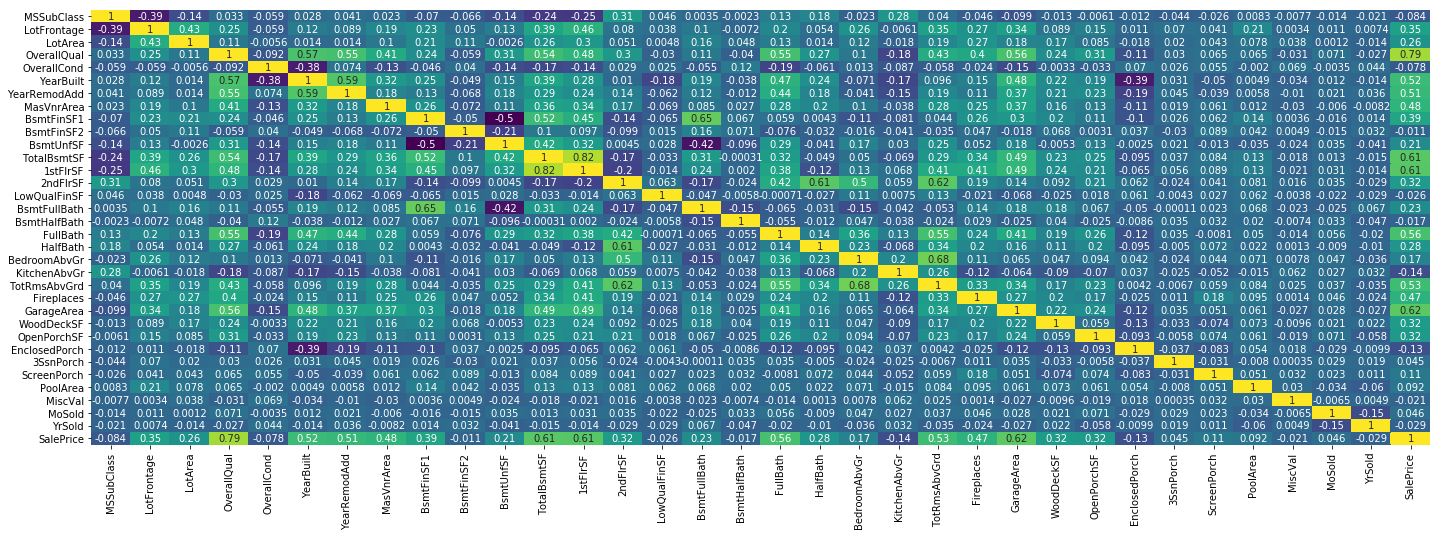

In [24]:
plt.figure(figsize= (24, 8))
sns.heatmap(housingData.corr(), cmap= 'viridis', annot= True, cbar= False)

From the heat map we can see 'GarageCars' has high colinearity (0.88) with 'GarageArea'. Also, 'GarageYrBlt' with 'YearBuilt' and 'GrLivArea' with 'TotRmsAbvGrd' exhibited high correlation (0.83). We will remove 'GarageCars', 'GarageYrBlt and 'GrLivAea'

In [135]:
housingData= housingData.drop(['GarageYrBlt', 'GarageCars', 'GrLivArea'], axis= 1)

In [136]:
def missingCalculator(df):
    ''' Display missing data count and percentage '''
    missing= pd.DataFrame(df.isnull().sum())
    missing.columns= ['countMissing']
    missing['pctMissing']= round(missing['countMissing']/len(housingData), 3)
    missing= missing.loc[missing['countMissing'] > 0].sort_values('pctMissing', ascending = False)
    return missing

In [137]:
missingCalculator(housingData)

,countMissing,pctMissing
PoolQC,1453,0.995
MiscFeature,1406,0.963
Alley,1369,0.938
Fence,1179,0.808
FireplaceQu,690,0.473
LotFrontage,259,0.177
GarageType,81,0.055
GarageFinish,81,0.055
GarageQual,81,0.055
GarageCond,81,0.055


From the data descriptor we can see that for PoolQC, MiscFeature, Alley, Fence and FireplaceQu the mising data is actually a seperate class 'not available' or 'not present'. We shall fill them with 'No'. Lets create a function to replace all NaNs with 'No' in those columns.

In [138]:
def fillingNull(columns, string = 'No'):
    '''Fill missing data with a string '''
    for c in columns:
        housingData[c].fillna(string, inplace= True)

In [139]:
fillingNull(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], 'No')

In [141]:
missingCalculator(housingData)

,countMissing,pctMissing
LotFrontage,259,0.177
GarageType,81,0.055
GarageFinish,81,0.055
GarageQual,81,0.055
GarageCond,81,0.055
BsmtExposure,38,0.026
BsmtFinType2,38,0.026
BsmtQual,37,0.025
BsmtCond,37,0.025
BsmtFinType1,37,0.025


Now, we can see four Garage feature are all aving 81 missing observations and all are basically having no garage. We shall replace this with 'No'

In [145]:
fillingNull(['GarageType', 'GarageQual', 'GarageCond', 'GarageFinish'], 'No')

In [146]:
missingCalculator(housingData)

,countMissing,pctMissing
LotFrontage,259,0.177
BsmtExposure,38,0.026
BsmtFinType2,38,0.026
BsmtQual,37,0.025
BsmtCond,37,0.025
BsmtFinType1,37,0.025
MasVnrType,8,0.005
MasVnrArea,8,0.005
Electrical,1,0.001


Basement features have 37 and 38 missing values. We should examin them 

In [166]:
housingData.loc[housingData['BsmtExposure'].isnull(), ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']]

,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


We can replave all these minnsing data with 'No'

In [167]:
fillingNull(['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1'])

In [168]:
missingCalculator(housingData)

,countMissing,pctMissing
LotFrontage,259,0.177
MasVnrType,8,0.005
MasVnrArea,8,0.005
Electrical,1,0.001
